# Assignment 1

## Question 3 (Linear Regression)

This assignment will have you working and experimenting with linear regression. The general multiple linear regression model, given $p$ predictors, is defined as: $$Y=\beta_0+\beta_1X_1+\beta_2X_2+...+\beta_pX_p+\epsilon,$$ where $Y$ is the response variable, $X_j$ is the $j$<sup>th</sup> predictor and $\beta_j$ quantifies the association between the response and the variable. A good way to think about $\beta_j$ is as the average effect on $Y$ of a one unit increase in $X_j$, holding all other predictors fixed. The $\epsilon$ term is the error term, which is independent of $X$ and has mean zero (the expected value of $Y$ when all variables are set to zero).

Work with Numpy only and do not use library functions that directly perform model fitting like `np.polyfit`. However, you may use library functions to compare your results while experimenting. This assignment becomes much easier to complete if accompanied by reading the third chapter in An Introduction to Statistical Learning. The text is freely available for download on the internet at [statlearning.com](statlearning.com)

Reference: James, G., Witten, D., Hastie, T., Tibshirani, R., Taylor, J. (2023). Linear Regression. In: An Introduction to Statistical Learning. Springer Texts in Statistics. Springer, Cham. https://doi.org/10.1007/978-3-031-38747-0_3

### Imports

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# other imports if necessary

### Part 1: Simple Regression

In this part, the function `gen_data()` samples hundred data points from a random 25 degree single-variable polynomial. This data is stored in the `predictor` and `response` variables. Your task is to experiment with linear regression on this dataset. Specifically:

1. Fit a line to the curve $(y=\beta_1x+\beta_0)$
2. Fit a polynomial to the curve $(y=\sum_{0}^{k}\beta_kx^k)$ and choose $k$ that satisfactorily minimizes error.
    - Note that the original polynomial is a 25 degree polynomial and we might not need exactly that many.
    - Check how well the coefficients match when we try to fit a 25 degree polynomial to the data. Get the coefficients from the `gen_data()` function.

Report error metrics for all experiments in tabular form (or any other way that helps us compare and choose between the different methods)



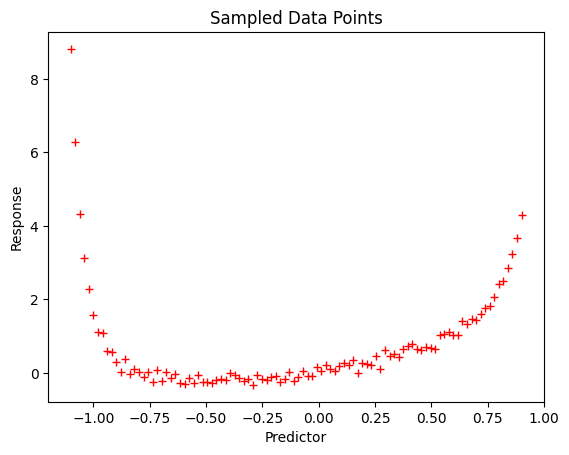

In [ ]:
def gen_data():
    coeff = np.random.rand(26)
    x = np.linspace(-1.1, 0.9, 100)
    y = np.zeros_like(x)
    for i, c in enumerate(coeff):
        y += c * x**i
    y += np.random.randn(100) * 0.1

    return x, y

predictor, response = gen_data()

plt.plot(predictor, response, 'r+')
plt.xlabel('Predictor')
plt.ylabel('Response')
plt.title('Sampled Data Points')
plt.show()

In [ ]:


X = np.vstack([predictor, np.ones(len(predictor))]).T
beta_1, beta_0 = np.linalg.lstsq(X, response, rcond=None)[0]

#Prediction for linear regression
y_pred_linear = beta_1 * predictor + beta_0

# Calculating mean squared residuals for linear regression
mse_linear = np.mean((response - y_pred_linear) ** 2)




In [ ]:
#initialization
best_degree = 0
best_coefficients = None
best_mse = float('inf')

#pseudo regularization using algebra
for degree in range(1, 26):
    X_poly = np.vander(predictor, degree + 1, increasing=True)
    coefficients = np.linalg.lstsq(X_poly, response, rcond=None)[0]
    y_pred_poly = np.dot(X_poly, coefficients)
    mse_poly = np.mean((response - y_pred_poly) ** 2)

    if mse_poly < best_mse:
        best_mse = mse_poly
        best_degree = degree
        best_coefficients = coefficients




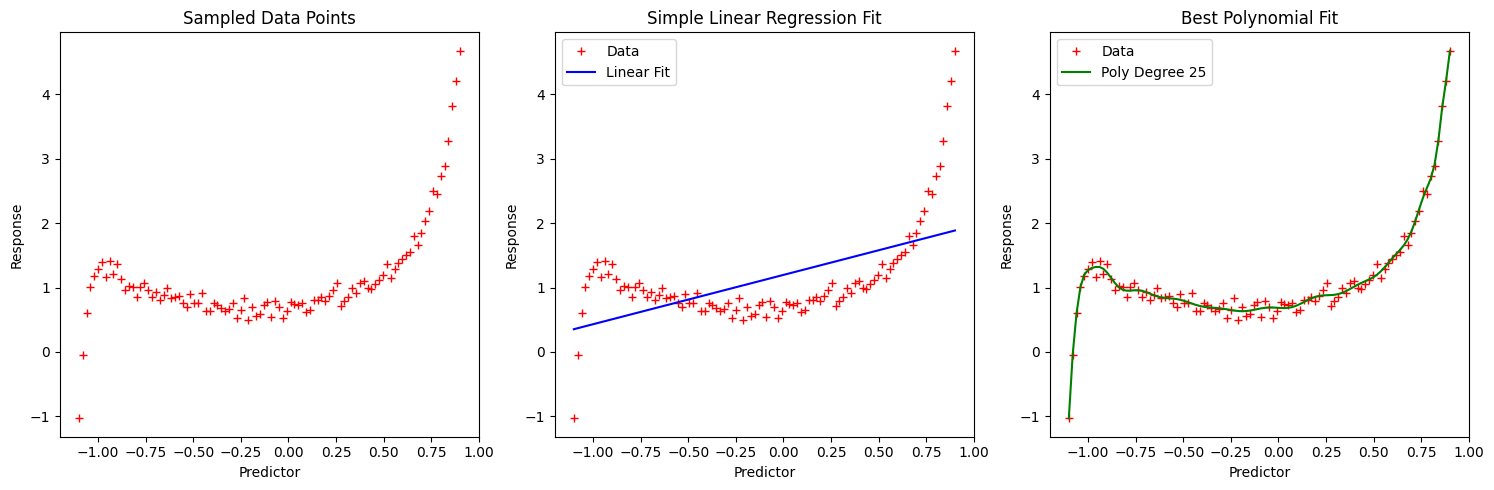

(0.42059817334491034,
 25,
 0.0064577896645019615,
 array([ 6.83886908e-01, -1.99526802e-01,  9.10510436e-01,  6.32737582e+01,
         7.11302829e+01, -1.86309980e+03, -2.36679655e+03,  2.56885364e+04,
         3.38412272e+04, -1.99476740e+05, -2.69917542e+05,  9.48495887e+05,
         1.33533104e+06, -2.86417656e+06, -4.30036171e+06,  5.49811509e+06,
         9.16790149e+06, -6.39876822e+06, -1.28250602e+07,  3.76643721e+06,
         1.13075214e+07, -4.47668949e+04, -5.69312896e+06, -1.18753034e+06,
         1.24691145e+06,  4.58524932e+05]))

In [ ]:
# Plotting
plt.figure(figsize=(15, 5))

# Plot original data points
plt.subplot(1, 3, 1)
plt.plot(predictor, response, 'r+')
plt.xlabel('Predictor')
plt.ylabel('Response')
plt.title('Sampled Data Points')

# Plot the fitted line from simple linear regression
plt.subplot(1, 3, 2)
plt.plot(predictor, response, 'r+', label='Data')
plt.plot(predictor, y_pred_linear, 'b-', label='Linear Fit')
plt.xlabel('Predictor')
plt.ylabel('Response')
plt.title('Simple Linear Regression Fit')
plt.legend()

# Plot the best fitting polynomial curve
X_poly_best = np.vander(predictor, best_degree + 1, increasing=True)
y_pred_poly_best = np.dot(X_poly_best, best_coefficients)

plt.subplot(1, 3, 3)
plt.plot(predictor, response, 'r+', label='Data')
plt.plot(predictor, y_pred_poly_best, 'g-', label=f'Poly Degree {best_degree}')
plt.xlabel('Predictor')
plt.ylabel('Response')
plt.title('Best Polynomial Fit')
plt.legend()

plt.tight_layout()
plt.show()

# Output the MSE and coefficients
mse_linear, best_degree, best_mse, best_coefficients

#### Part 1.1 Regularization

In this section, you will be required to perform the converse of the previous section. After generating data from a lower degree polynomial, you will try to fit a higher degree polynomial to it. This will result in overfitting. You will then use regularization to reduce the overfitting. Try both L1 and L2 regularization and compare the results.

In [ ]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import Lasso, Ridge
from sklearn.metrics import mean_squared_error

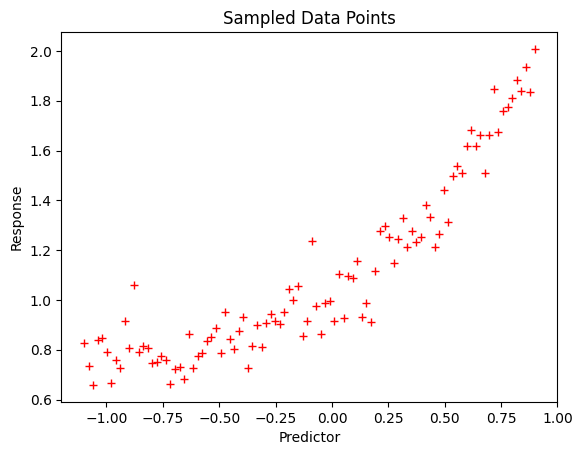

In [ ]:
def gen_data_low():
    coeff = np.random.rand(np.random.choice([3, 5, 7]))
    x = np.linspace(-1.1, 0.9, 100)
    y = np.zeros_like(x)
    for i, c in enumerate(coeff):
        y += c * x**i
    y += np.random.randn(100) * 0.1

    return x, y

predictor_low, response_low = gen_data_low()

plt.plot(predictor_low, response_low, 'r+')
plt.xlabel('Predictor')
plt.ylabel('Response')
plt.title('Sampled Data Points')
plt.show()

In [ ]:


# Repeating the previous steps with the generated data
# Create polynomial features
poly_features = PolynomialFeatures(degree=degree)
X_poly_low = poly_features.fit_transform(predictor_low.reshape(-1, 1))

# Fit polynomial regression model without regularization (overfitting)
poly_reg_low = np.linalg.lstsq(X_poly_low, response_low, rcond=None)[0]

# Fit polynomial regression model with L1 (Lasso) regularization
lasso_reg_low = Lasso(alpha=0.01)  #  alpha value is adjustable
lasso_reg_low.fit(X_poly_low, response_low)

# Fit polynomial regression model with L2 (Ridge) regularization
ridge_reg_low = Ridge(alpha=0.01)  # tuned alpha value
ridge_reg_low.fit(X_poly_low, response_low)

# Calculate predicted values for each model
y_pred_poly_low = np.dot(X_poly_low, poly_reg_low)
y_pred_lasso_low = lasso_reg_low.predict(X_poly_low)
y_pred_ridge_low = ridge_reg_low.predict(X_poly_low)

# Calculate the mean squared error for each model
mse_poly_low = mean_squared_error(response_low, y_pred_poly_low)
mse_lasso_low = mean_squared_error(response_low, y_pred_lasso_low)
mse_ridge_low = mean_squared_error(response_low, y_pred_ridge_low)



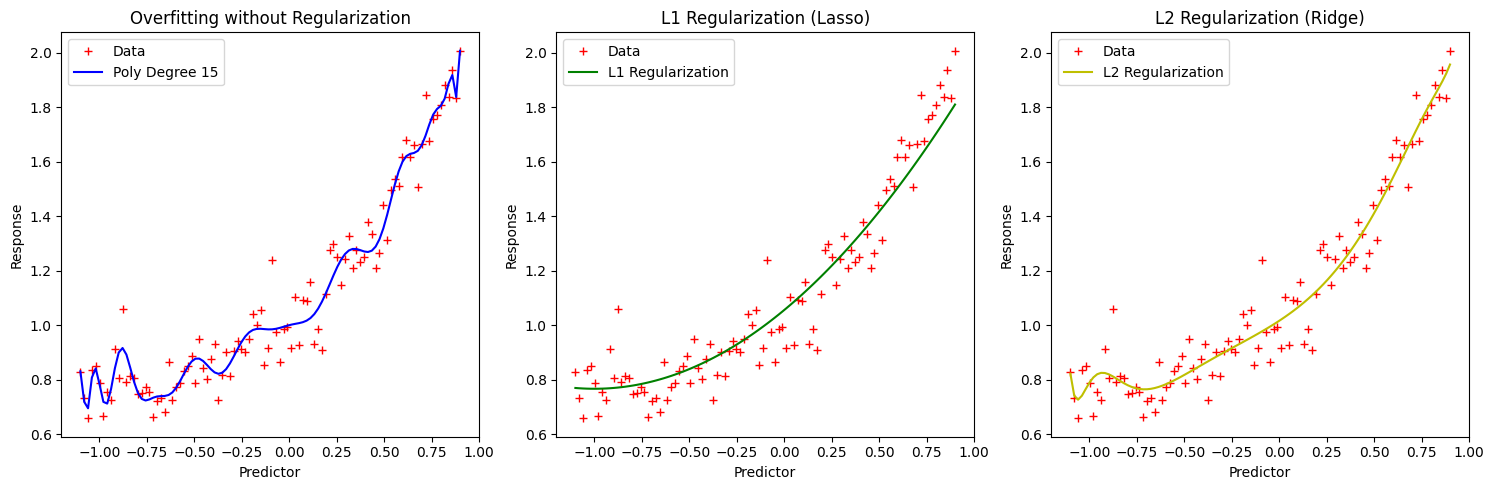

(0.004954488156108379,
 0.009489151778796697,
 0.006719971005916853,
 array([ 0.        ,  0.5779591 ,  0.28909364,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        , -0.        ,  0.        ,
        -0.        ,  0.        , -0.        ,  0.        , -0.        ,
         0.        , -0.        ,  0.        , -0.        ,  0.        ,
        -0.        ]),
 array([ 0.00000000e+00,  4.57133656e-01,  3.70154111e-01,  6.23873424e-01,
         5.76224467e-02, -2.01860176e-01,  1.18696171e-01, -3.84018253e-01,
         5.46272650e-02, -2.46975010e-01, -4.22214317e-02, -4.02357583e-02,
        -1.07878331e-01,  1.10860445e-01, -1.17555223e-01,  1.73515023e-01,
        -7.50770814e-02,  1.61671580e-01, -5.80803405e-04,  1.07096742e-01,
         7.89632126e-02,  4.52150233e-02,  1.35538096e-01,  9.11292456e-03,
         1.43117913e-01,  2.73598335e-02]))

In [ ]:

# Plotting
plt.figure(figsize=(15, 5))

# Plot original data points
plt.subplot(1, 3, 1)
plt.plot(predictor_low, response_low, 'r+', label='Data')
plt.plot(predictor_low, y_pred_poly_low, 'b-', label='Poly Degree 15')
plt.xlabel('Predictor')
plt.ylabel('Response')
plt.title('Overfitting without Regularization')
plt.legend()

# Plot L1 regularization (Lasso)
plt.subplot(1, 3, 2)
plt.plot(predictor_low, response_low, 'r+', label='Data')
plt.plot(predictor_low, y_pred_lasso_low, 'g-', label='L1 Regularization')
plt.xlabel('Predictor')
plt.ylabel('Response')
plt.title('L1 Regularization (Lasso)')
plt.legend()

# Plot L2 regularization (Ridge)
plt.subplot(1, 3, 3)
plt.plot(predictor_low, response_low, 'r+', label='Data')
plt.plot(predictor_low, y_pred_ridge_low, 'y-', label='L2 Regularization')
plt.xlabel('Predictor')
plt.ylabel('Response')
plt.title('L2 Regularization (Ridge)')
plt.legend()

plt.tight_layout()
plt.show()

# Print the results
mse_poly_low, mse_lasso_low, mse_ridge_low, lasso_reg_low.coef_, ridge_reg_low.coef_


### Part 2: Credit Data

In this part, we work with the credit.csv file that predicts `Balance` after looking at predictors like `Income`, `Age`, `Limit`, etc. Your task is to understand the relationship between the predictors and response using linear regression techniques. Specifically:

1. Perform multiple linear regression on the dataset. $(Y=\sum\beta_iX_i+\epsilon)$
2. Test whether all the variables are needed to predict `Balance` or if any of them can be discarded.
3. Test for [interaction effects](https://en.wikipedia.org/wiki/Interaction_(statistics)#In_regression) between `Rating` and `Age`.

As before, perform the above experiments by obtaining and reporting error metrics for all experiments.

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error


In [ ]:
from google.colab import files
uploaded = files.upload()


Saving credit.csv to credit.csv


In [ ]:

df = pd.read_csv('credit.csv')

# Define features/predictors and target
X = df[['Income', 'Limit', 'Rating', 'Cards', 'Age', 'Education']]
y = df['Balance']


In [ ]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#Fitting the linear regression model for Task 1
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")


Mean Squared Error: 29863.873501581307


In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Lasso
# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Lasso regression with increased max_iter and a chosen alpha
lasso = Lasso(alpha=0.1, max_iter=10000)
lasso.fit(X_train_scaled, y_train)

# Coefficients from Lasso regression
lasso_coef = lasso.coef_
print("Lasso Coefficients:", lasso_coef)

# Make predictions using the lasso model
y_pred_lasso = lasso.predict(X_test_scaled)

# Calculate the mean squared error using lasso
mse_lasso = mean_squared_error(y_test, y_pred_lasso)
print("Mean Squared Error with Lasso:", mse_lasso)

Lasso Coefficients: [-256.54377965  412.82942097  209.70114092   24.00471675  -15.47693013
    6.68965946]
Mean Squared Error with Lasso: 29919.344996367006


In [ ]:
# Task 3: Test for interaction effects between Rating and Age
# Creating an interaction term
df['Rating_Age_Interaction'] = df['Rating'] * df['Age']

# Redefine the features to include the interaction term
X_interaction = df[['Income', 'Limit', 'Rating', 'Cards', 'Age', 'Education', 'Rating_Age_Interaction']]

# Split the data with interaction term into training and testing sets
X_train_interaction, X_test_interaction, y_train_interaction, y_test_interaction = train_test_split(X_interaction, y, test_size=0.2, random_state=42)

# Fit the linear regression model with interaction term for Task 3
model_interaction = LinearRegression()
model_interaction.fit(X_train_interaction, y_train_interaction)

# Make predictions with interaction term
y_pred_interaction = model_interaction.predict(X_test_interaction)

# Calculate the mean squared error with interaction term for Task 3
mse_interaction = mean_squared_error(y_test_interaction, y_pred_interaction)
print(f"Mean Squared Error with Interaction Term: {mse_interaction}")

Mean Squared Error with Interaction Term: 29852.965631942894


### Part 3: Shark Attacks

This is a fun dataset that aims to predict the number of shark attacks (`SharkAttacks`) using variables like `Year`, `Month`, `Temperature`, and `IceCreamSales`. This dataset has been used in popular media to show how correlation does not imply causation. Test whether predictions made with ice cream sales data are any better/worse than predictions made by neglecting ice cream sales data.

This sort of analysis reminds us that it is important to look at the data before using it for learning representations.

In [ ]:
from google.colab import files
uploaded = files.upload()


Saving shark_attacks.csv to shark_attacks.csv


In [ ]:
sharks = pd.read_csv('shark_attacks.csv')
sharks.head()

,Year,Month,SharkAttacks,Temperature,IceCreamSales
0,2008,1,25,11.9,76
1,2008,2,28,15.2,79
2,2008,3,32,17.2,91
3,2008,4,35,18.5,95
4,2008,5,38,19.4,103


In [ ]:

y = sharks['SharkAttacks']

# Without IceCreamSales
X_without_ice_cream = sharks[['Year', 'Month', 'Temperature']]

# With IceCreamSales
X_with_ice_cream = sharks[['Year', 'Month', 'Temperature', 'IceCreamSales']]

X_train_without, X_test_without, y_train_without, y_test_without = train_test_split(X_without_ice_cream, y, test_size=0.2, random_state=42)
X_train_with, X_test_with, y_train_with, y_test_with = train_test_split(X_with_ice_cream, y, test_size=0.2, random_state=42)


model_without_ice_cream = LinearRegression()
model_without_ice_cream.fit(X_train_without, y_train_without)

model_with_ice_cream = LinearRegression()
model_with_ice_cream.fit(X_train_with, y_train_with)

y_pred_without = model_without_ice_cream.predict(X_test_without)
mse_without = mean_squared_error(y_test_without, y_pred_without)
print(f"Mean Squared Error without IceCreamSales: {mse_without}")

y_pred_with = model_with_ice_cream.predict(X_test_with)
mse_with = mean_squared_error(y_test_with, y_pred_with)
print(f"Mean Squared Error with IceCreamSales: {mse_with}")

Mean Squared Error without IceCreamSales: 43.38138077679057
Mean Squared Error with IceCreamSales: 37.67537629667506
